---
title: "Comparing values of different scales"
subtitle: "Using [brokenaxes package](https://pypi.org/project/brokenaxes/) to create matplotlib plots with broken axis"
author: Marco Dalla Vecchia
date: 12/06/2024
---

In [2]:
# Import packages
from matplotlib import pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes as ba

# Aesthetics
plt.rcParams["font.family"] = "serif" # use Serif style as default font
sns.set_style('ticks')

In [3]:
# Create simple data
x = ["Austria", "Italy", "China"]
y = [9.04, 58.94, 1412.0] # millions of inhabitants

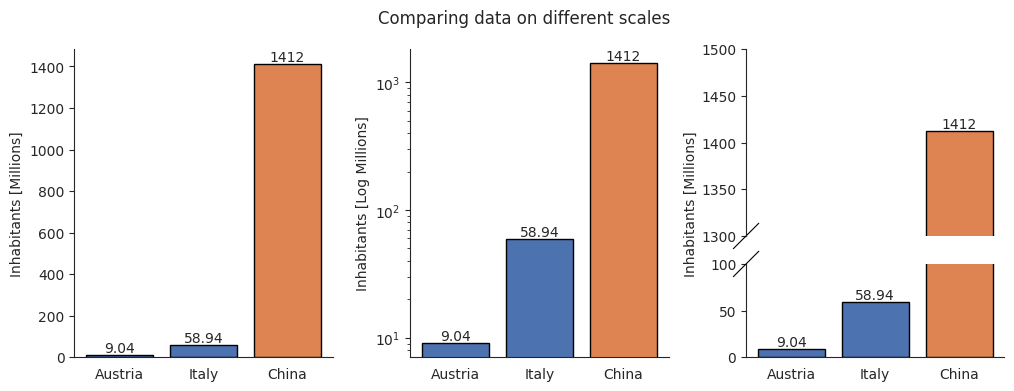

In [4]:
#| label: fig-broken-ax
#| fig-cap: "Comparing values of different scales"

pal = sns.color_palette('deep', 2)
colors = [pal[0], pal[0], pal[1]]

fig = plt.figure(figsize=(12,4))

g1,g2,g3 = fig.add_gridspec(1,3, wspace=0.3)

ax1 = fig.add_subplot(g1)
p1 = ax1.bar(x,y, color=colors, edgecolor='black', lw=1)
ax1.tick_params(axis='x', which='both', bottom=False)
ax1.set_ylabel('Inhabitants [Millions]')
ax1.bar_label(p1)

ax2 = fig.add_subplot(g2)
ax2.set_yscale('log')
p2 = ax2.bar(x,y, color=colors, edgecolor='black', lw=1)
ax2.bar_label(p2)
ax2.set_ylabel('Inhabitants [Log Millions]')

bax = ba(ylims=((0,100),(1300,1500)), subplot_spec=g3)
bp = bax.bar(x,y, color=colors, edgecolor='black', lw=1)
bax.set_ylabel('Inhabitants [Millions]', labelpad=35)
fig.get_axes()[2].bar_label(bp[0])
fig.get_axes()[3].bar_label(bp[0])

for ax in fig.get_axes():
    ax.tick_params(axis='x', which='both', bottom=False)
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)

fig.suptitle('Comparing data on different scales')
fig.savefig('../figures/whole-vs-broken.pdf', bbox_inches='tight')